In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('international-airline-passengers.csv')
train = data.iloc[:, 1]
train

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

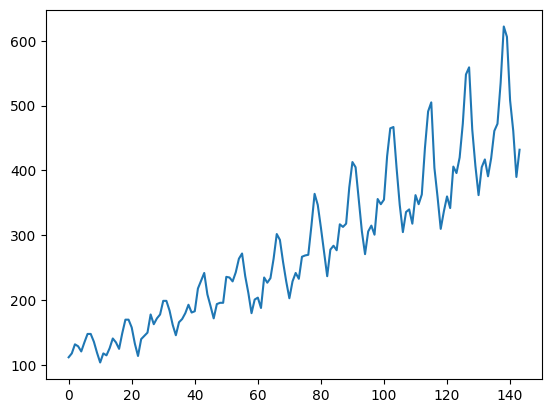

In [151]:
plt.plot(train)
plt.show()

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(train.values.reshape(-1, 1))
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [153]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [154]:
time_stemp = 5
x_train, y_train, x_test, y_test = [], [], [], []

for i in range(len(train)-time_stemp-1):
    x_train.append(train[i:(i+time_stemp), 0])
    y_train.append(train[i + time_stemp, 0])

for i in range(len(test)-time_stemp-1):
    x_test.append(test[i:(i+time_stemp), 0])
    y_test.append(test[i + time_stemp, 0])

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)


In [155]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
model = Sequential()
model.add(LSTM(10, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=25, batch_size=1)



C:\Users\Ufuk\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0300
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 
Epoch 16/25
66

In [156]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Train Score: 29.19 RMSE
Test Score: 70.85 RMSE


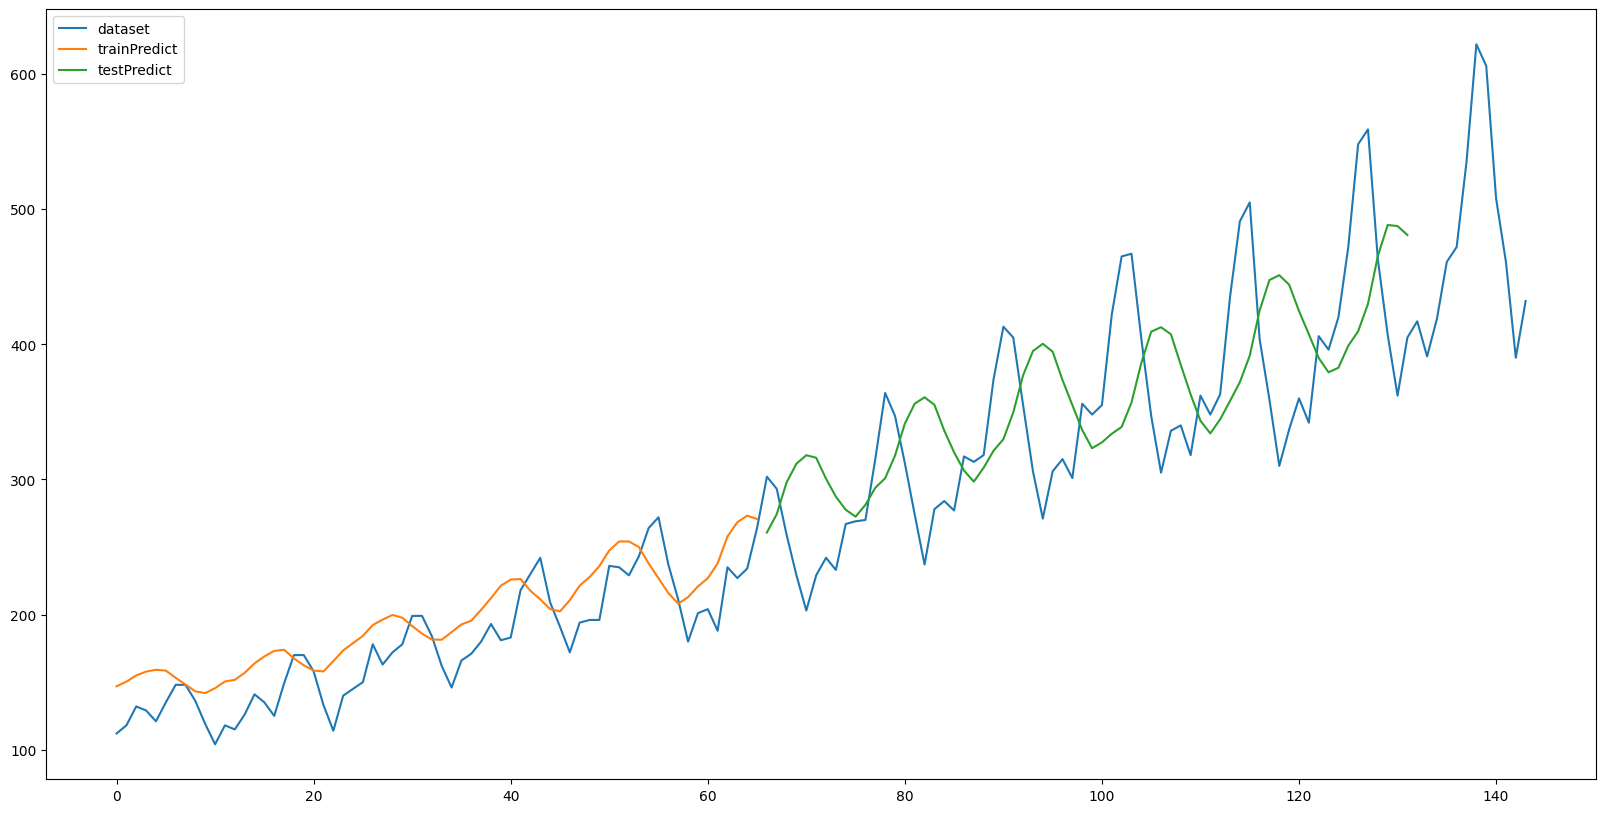

In [157]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[0:len(trainPredict), :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict):len(trainPredict)+len(testPredict), :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['dataset', 'trainPredict', 'testPredict'])
plt.show()